***Data Visulization***

Step 1: Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")


**Step 2: Load the CSV File**

In [11]:
data = pd.read_csv(r"E:\3 sem\big data project\INDIA_RETAIL_DATA_SIMPLIFIED.csv")
print("Data Loaded Successfully!")
print(data.head())


Data Loaded Successfully!
   Order_Date   Ship_Date    Product_Type Product_Sub_Category  Unit_Price  \
0  2010-01-02  2010-01-04  Processed Meat                Bacon       40.98   
1  2010-01-02  2010-01-09  Processed Meat      Fresh Water Eel      155.06   
2  2010-01-02  2010-01-04  Processed Meat        Smoked Salmon        9.11   
3  2010-01-02  2010-01-02  Processed Meat        Smoked Salmon       15.04   
4  2010-01-03  2010-01-04  Processed Meat            Foie Gras        4.26   

   QtyOrdered    Profit    Sales  
0           3  -19.0992   124.81  
1           8  845.6640  1225.60  
2           4   20.2996    34.41  
3          11  108.5163   157.27  
4          29    9.8200   122.23  


**Step 3: Create Total Sales Column**

In [12]:
data["Total_Sales"] = data["QtyOrdered"] * data["Unit_Price"]
print("Total_Sales column created successfully!")


Total_Sales column created successfully!


**Step 4: Total Sales Amount (Pie Chart)**

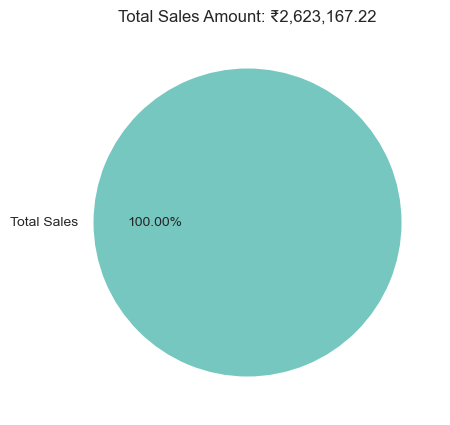

In [13]:
total_sales = data["Total_Sales"].sum()
plt.figure(figsize=(5,5))
plt.pie([total_sales], labels=["Total Sales"], autopct='%1.2f%%', colors=["#76C7C0"])
plt.title(f"Total Sales Amount: ₹{total_sales:,.2f}")
plt.show()


In [14]:
data["Total_Sales"] = data["QtyOrdered"] * data["Unit_Price"]
print("Total_Sales column created successfully!")
print(data.head())


Total_Sales column created successfully!
   Order_Date   Ship_Date    Product_Type Product_Sub_Category  Unit_Price  \
0  2010-01-02  2010-01-04  Processed Meat                Bacon       40.98   
1  2010-01-02  2010-01-09  Processed Meat      Fresh Water Eel      155.06   
2  2010-01-02  2010-01-04  Processed Meat        Smoked Salmon        9.11   
3  2010-01-02  2010-01-02  Processed Meat        Smoked Salmon       15.04   
4  2010-01-03  2010-01-04  Processed Meat            Foie Gras        4.26   

   QtyOrdered    Profit    Sales  Total_Sales  
0           3  -19.0992   124.81       122.94  
1           8  845.6640  1225.60      1240.48  
2           4   20.2996    34.41        36.44  
3          11  108.5163   157.27       165.44  
4          29    9.8200   122.23       123.54  


**Step 5: Total Sales by Product Type (Bar Graph)**

C:\Users\himan\AppData\Local\Temp\ipykernel_9956\2993180878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette="viridis")


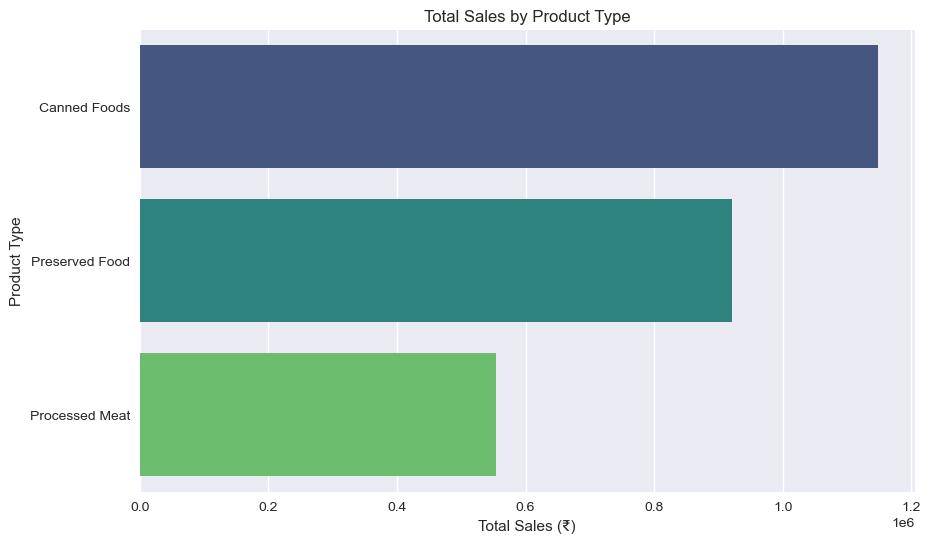

In [15]:
sales_by_product = data.groupby("Product_Type")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette="viridis")
plt.title("Total Sales by Product Type")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product Type")
plt.show()


**Step 6: Top 10 Sub-Categories by Sales**

C:\Users\himan\AppData\Local\Temp\ipykernel_9956\3308071622.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_subcategory.values, y=sales_by_subcategory.index, palette="mako")


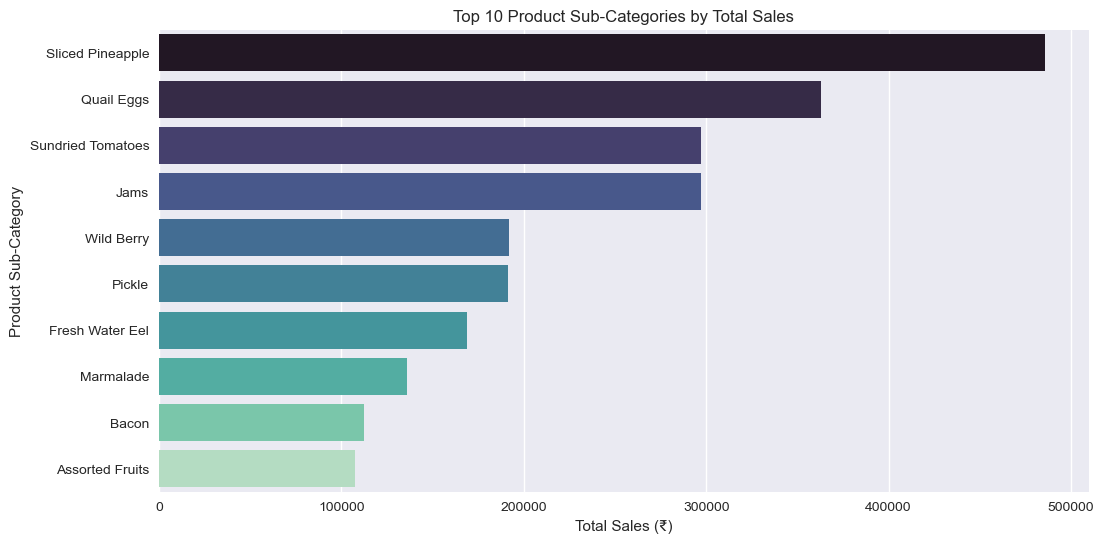

In [16]:
sales_by_subcategory = data.groupby("Product_Sub_Category")["Total_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_subcategory.values, y=sales_by_subcategory.index, palette="mako")
plt.title("Top 10 Product Sub-Categories by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product Sub-Category")
plt.show()


**Step 7: Total Profit vs Total Sales (Comparative Bar Chart)**

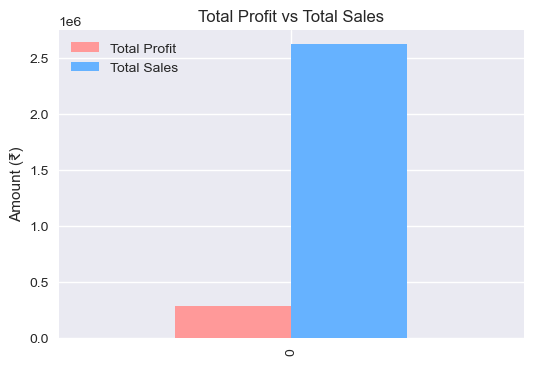

In [17]:
profit_sales = pd.DataFrame({
    "Total Profit": [data["Profit"].sum()],
    "Total Sales": [data["Total_Sales"].sum()]
})

profit_sales.plot(kind='bar', figsize=(6,4), color=["#FF9999","#66B2FF"])
plt.title("Total Profit vs Total Sales")
plt.ylabel("Amount (₹)")
plt.show()


**Step 8: Monthly Sales Trend (Line Graph)**

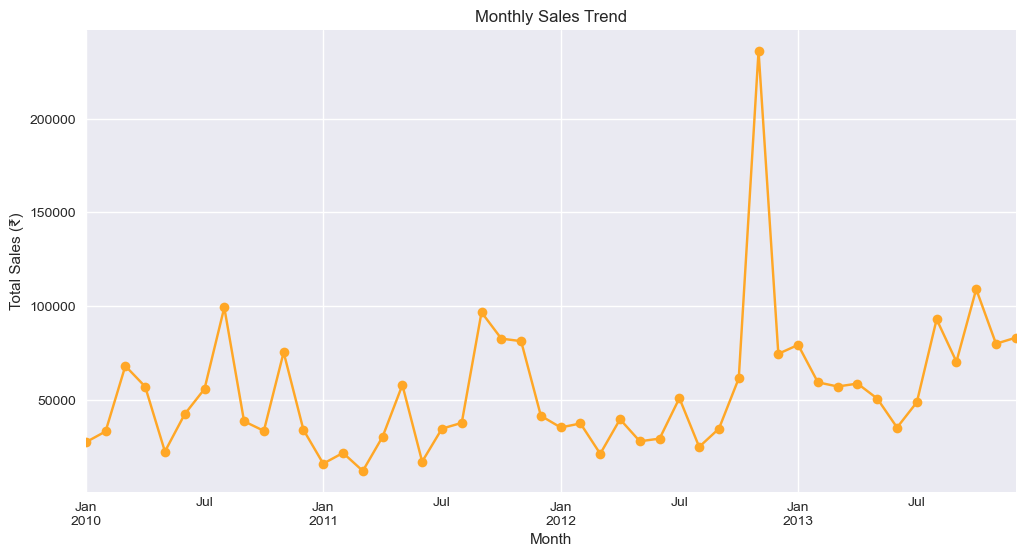

In [18]:
data["Order_Date"] = pd.to_datetime(data["Order_Date"])
monthly_sales = data.groupby(data["Order_Date"].dt.to_period("M"))["Total_Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='#FFA726')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True)
plt.show()
